# **Import Libraries**

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms

# Reading the **Data**

In [ ]:
df= pd.read_csv('playstation.csv')
df1 = pd.DataFrame(df)

# **Display the first 10 rows of the dataset**

In [ ]:
df.head(10)

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20 million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5 million,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16 million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8 million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10 million,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10 million,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10 million,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9.73 million,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8.42 million,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8 million,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


# Provide a description of the dataset, including summary statistics.

In [ ]:
df.describe()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
count,33,33,33,33,33,33
unique,33,24,32,15,23,12
top,Marvel's Spider-Man,2 million,"November 15, 2013",Action role-playing,Square Enix,Sony Interactive Entertainment
freq,1,4,2,11,4,8


# **Show the shape of the dataset**

In [ ]:
df.shape

(33, 6)

# Display the data types of each column.

In [ ]:
df.dtypes

Game               object
Copies sold        object
Release date[a]    object
Genre(s)           object
Developer(s)       object
Publisher(s)       object
dtype: object

# **Extract the year from the 'Release date' column and create a new column named 'Release Year'.**

In [ ]:
df1['Release date[a]'] = pd.to_datetime(df1['Release date[a]'])
df1['Release Year'] = df1['Release date[a]'].dt.year
df1['Release Year']

0     2018
1     2018
2     2016
3     2015
4     2020
5     2017
6     2014
7     2020
8     2015
9     2017
10    2014
11    2018
12    2020
13    2018
14    2020
15    2016
16    2017
17    2016
18    2019
19    2013
20    2014
21    2015
22    2014
23    2013
24    2014
25    2017
26    2020
27    2016
28    2017
29    2015
30    2017
31    2019
32    2017
Name: Release Year, dtype: int32

# **Identify the top-selling video games based on the 'Copies sold' column.**
# Create a visualization (e.g., bar chart) to represent the top-selling games.

In [ ]:
df_sorted = df.sort_values(by='Copies sold', ascending=False)
top_selling_games = df_sorted.head(10)
print("Top Selling Video Games:")
print(top_selling_games[['Game', 'Copies sold']])


Top Selling Video Games:
                         Game  Copies sold
0         Marvel's Spider-Man   20000000.0
1                  God of War   19500000.0
2  Uncharted 4: A Thief's End   16000000.0
3    The Witcher 3: Wild Hunt   10800000.0
4      The Last of Us Part II   10000000.0
5           Horizon Zero Dawn   10000000.0
6   The Last of Us Remastered   10000000.0
7           Ghost of Tsushima    9730000.0
8       Star Wars Battlefront    8420000.0
9          Gran Turismo Sport    8000000.0


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_selling_games['Game'], top_selling_games['Copies sold'], color='red')
plt.xlabel('Games')
plt.ylabel('Copies Sold')
plt.title('Top Selling Video Games')
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'plt' is not defined

# **Display the distribution of video game genres using a visualization.**

<Figure size 1000x600 with 0 Axes>

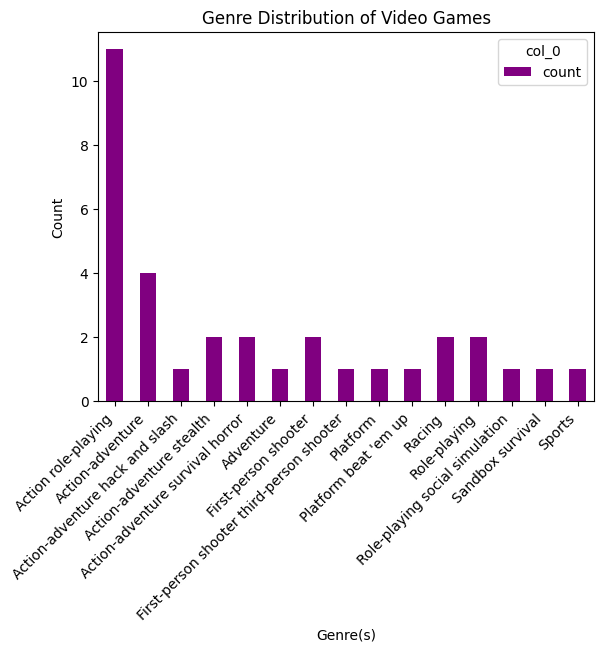

In [ ]:
genre_cross = pd.crosstab(index=df1['Genre(s)'], columns='count')

plt.figure(figsize=(10, 6))
genre_cross.plot(kind='bar', stacked=True, color='blue')
plt.xlabel('Genre(s)')
plt.ylabel('Count')
plt.title('Genre Distribution of Video Games')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Identify the developers with the highest total sales based on the 'Copies sold' column.**
# List the top 5 developers.

In [ ]:
developer_sales = df.groupby('Developer(s)')['Copies sold'].sum()
top_developers = developer_sales.sort_values(ascending=False).head(5)
print("Top 5 Developers by Total Sales:")
print(top_developers)

Top 5 Developers by Total Sales:
Developer(s)
Sucker Punch Productions                     9.73 million6 million
EA DICE                                    8.42 million1.3 million
Polyphony Digital                                        8 million
Quantic Dream                                          5.5 million
Square Enix                 5 million1.3 million1 million1 million
Name: Copies sold, dtype: object


# **Filter the dataset to include only games released after 2016.**
# Calculate the standard deviation of 'Copies sold' for these games.

In [ ]:
df['Release date[a]'] = pd.to_datetime(df['Release date[a]'], errors='coerce')
df_filtered = df[df['Release date[a]'].dt.year > 2016]
print(df_filtered)

                                         Game  Copies sold Release date[a]  \
0                         Marvel's Spider-Man   20000000.0      2018-09-07   
1                                  God of War   19500000.0      2018-04-20   
4                      The Last of Us Part II   10000000.0      2020-06-19   
5                           Horizon Zero Dawn   10000000.0      2017-02-28   
7                           Ghost of Tsushima    9730000.0      2020-07-17   
9                          Gran Turismo Sport    8000000.0      2017-10-17   
11                      Detroit: Become Human    5500000.0      2018-05-25   
12                   Final Fantasy VII Remake    5000000.0      2020-04-10   
13                      Monster Hunter: World    4670000.0      2018-01-26   
14                             Cyberpunk 2077    3830000.0      2020-12-10   
16            Crash Bandicoot N. Sane Trilogy    2500000.0      2017-06-30   
18                            Persona 5 Royal    2300000.0      

In [ ]:
std_dev_copies_sold = df_filtered['Copies sold'].std()
print("Standard Deviation of Copies Sold for Games Released After 2016:", std_dev_copies_sold)

Standard Deviation of Copies Sold for Games Released After 2016: 5938085.698666355


Group the data by 'Genre(s)'.

Calculate the average 'Copies sold' for each genre.

Determine which genre tends to have the highest average sales

In [ ]:
genre_groups = df.groupby('Genre(s)')

# Display the groups
for genre, group_data in genre_groups:
    print(genre)
    print(group_data)

Action role-playing
                        Game  Copies sold Release date[a]  \
3   The Witcher 3: Wild Hunt   10800000.0      2015-05-18   
5          Horizon Zero Dawn   10000000.0      2017-02-28   
12  Final Fantasy VII Remake    5000000.0      2020-04-10   
13     Monster Hunter: World    4670000.0      2018-01-26   
14            Cyberpunk 2077    3830000.0      2020-12-10   
17          Final Fantasy XV    2500000.0      2016-11-29   
21                Bloodborne    2000000.0      2015-03-24   
25            Nier: Automata    1600000.0      2017-02-23   
26                    Nioh 2    1400000.0      2020-03-12   
31        Kingdom Hearts III    1000000.0      2019-01-25   
32                      Nioh    1000000.0      2017-02-07   

               Genre(s)                     Developer(s)  \
3   Action role-playing                   CD Projekt Red   
5   Action role-playing                  Guerrilla Games   
12  Action role-playing                      Square Enix   
13  Act

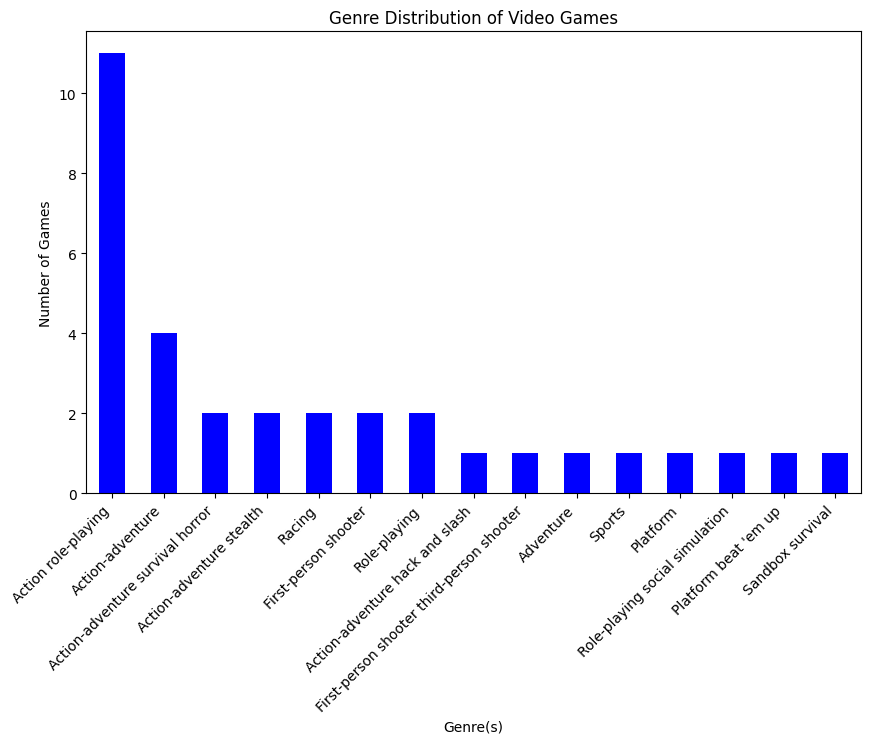

In [ ]:
genre_counts = df['Genre(s)'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='pink')
plt.xlabel('Genre(s)')
plt.ylabel('Number of Games')
plt.title('Genre Distribution of Video Games')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
genre_avg_copies_sold = df.groupby('Genre(s)')['Copies sold'].mean()
print("Average Copies Sold for Each Genre:")
print(genre_avg_copies_sold)

Average Copies Sold for Each Genre:
Genre(s)
Action role-playing                          3.981818e+06
Action-adventure                             1.100500e+07
Action-adventure hack and slash              1.950000e+07
Action-adventure stealth                     5.415000e+06
Action-adventure survival horror             1.000000e+07
Adventure                                    5.500000e+06
First-person shooter                         1.700000e+06
First-person shooter third-person shooter    8.420000e+06
Platform                                     2.500000e+06
Platform beat 'em up                         2.000000e+06
Racing                                       5.000000e+06
Role-playing                                 1.150000e+06
Role-playing social simulation               2.300000e+06
Sandbox survival                             2.000000e+06
Sports                                       3.120000e+06
Name: Copies sold, dtype: float64


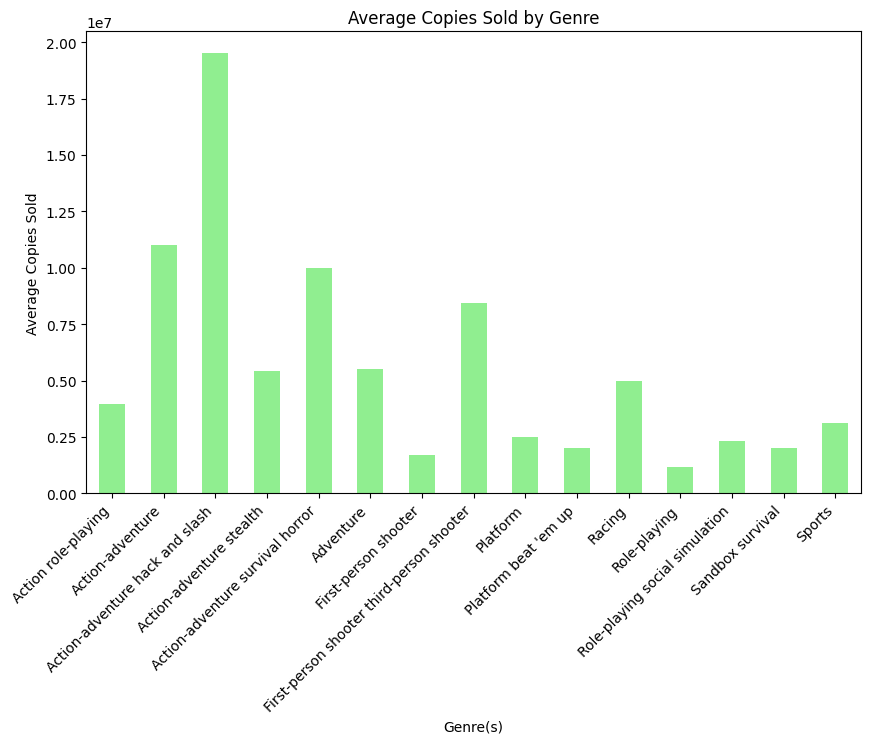

In [ ]:
genre_avg_copies_sold = df.groupby('Genre(s)')['Copies sold'].mean()
plt.figure(figsize=(10, 6))
genre_avg_copies_sold.plot(kind='bar', color='green')
plt.xlabel('Genre(s)')
plt.ylabel('Average Copies Sold')
plt.title('Average Copies Sold by Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
genre_avg_sales = df.groupby('Genre(s)')['Copies sold'].mean()
highest_avg_sales_genre = genre_avg_sales.idxmax()
highest_avg_sales = genre_avg_sales.max()
print("Genre with the Highest Average Sales:")
print("Genre:", highest_avg_sales_genre)
print("Average Sales:", highest_avg_sales)

Genre with the Highest Average Sales:
Genre: Action-adventure hack and slash
Average Sales: 19500000.0


# Create a scatter plot to visualize the relationship between 'Copies sold' and 'Release Year'.

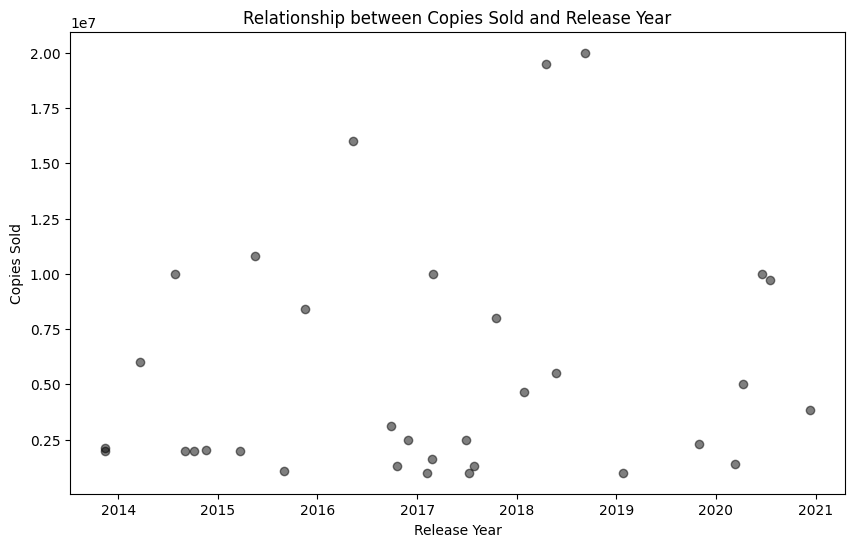

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Release date[a]'], df['Copies sold'], color='yellow', alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Copies Sold')
plt.title('Relationship between Copies Sold and Release Year')
plt.show()